In [ ]:
!pip install setfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install transformers==4.39.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.0 which is incompatible.
setfit 1.1.0 requires transformers>=4.41.0, but you have transformers 4.39.0 which is incompatible.


In [ ]:
!pip install huggingface_hub==0.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.0 which is incompatible.
setfit 1.1.0 requires transformers>=4.41.0, but you have transformers 4.39.0 which is incompatible.


In [ ]:
from datasets import load_dataset
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
import datasets
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import numpy as np
#np.random.seed(2)

# Step1: classifcation on the 6 dimensions


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/kritik_projekt/setfit_data/codierungen_paradigmatic.csv', sep='\t')
df = df.fillna('None')
df_paradigmatic = df[df['paradigmatic'] == 1]
df_none = df[(df['dimension'] == 'None') & (df['paradigmatic'] != 1)].sample(n=50, random_state=22) #randomly select n "None"-sentences
#df_data_for_test = pd.concat([df_none, df_paradigmatic], ignore_index = True) # df_paradigmatic #

x, x_train, y, y_train = train_test_split(df_paradigmatic['text'], df_paradigmatic['dimension'], test_size=0.6, stratify=df_paradigmatic['dimension'], random_state=42)
x_train = pd.concat([df_none['text'].reset_index(drop=True), x_train.reset_index(drop=True)], axis=0)
y_train = pd.concat([df_none['dimension'].reset_index(drop=True), y_train.reset_index(drop=True)], axis=0)
x_test, x_val, y_test, y_val = train_test_split(x,y,test_size = 0.5, stratify=y, random_state=22)

train_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_train, y_train)).items(), columns=['text', 'dimension'] ))
eval_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_test, y_test)).items(), columns=['text', 'dimension'] ))
test_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_val, y_val)).items(), columns=['text', 'dimension'] ))

In [ ]:
print(len(train_dataset))
print(len(eval_dataset))
print(len(test_dataset))
print(set(train_dataset['dimension']))
print(eval_dataset['dimension'])
print(test_dataset['dimension'])

53
17
18
{'Gesund-Krank', 'Harmonisch-Disharmonisch', 'None', 'Natürlich-Kulturell', 'Traditionell-Modern', 'Tief-Oberflächlich'}
['Harmonisch-Disharmonisch', 'Gesund-Krank', 'Harmonisch-Disharmonisch', 'Natürlich-Kulturell', 'Tief-Oberflächlich', 'Gesund-Krank', 'Tief-Oberflächlich', 'Traditionell-Modern', 'Traditionell-Modern', 'None', 'Natürlich-Kulturell', 'Tief-Oberflächlich', 'Gesund-Krank', 'Traditionell-Modern', 'Harmonisch-Disharmonisch', 'None', 'Natürlich-Kulturell']
['Gesund-Krank', 'Natürlich-Kulturell', 'Harmonisch-Disharmonisch', 'Harmonisch-Disharmonisch', 'Tief-Oberflächlich', 'Traditionell-Modern', 'None', 'Harmonisch-Disharmonisch', 'Gesund-Krank', 'Natürlich-Kulturell', 'Harmonisch-Disharmonisch', 'Traditionell-Modern', 'Traditionell-Modern', 'Gesund-Krank', 'Tief-Oberflächlich', 'Traditionell-Modern', 'Natürlich-Kulturell', 'Tief-Oberflächlich']


In [ ]:
# Load SetFit model from Hub
model = SetFitModel.from_pretrained('intfloat/multilingual-e5-large')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
args = TrainingArguments(
    batch_size=8,
    num_epochs=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True,
    logging_steps=50,               # number of steps to output logging (set lower because of small dataset size)
)

# Create trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    metric="accuracy",
    column_mapping={"text": "text", "dimension": "label"},  # Map dataset columns to text/label expected by trainer
)


The `evaluation_strategy` argument is deprecated and will be removed in a future version. Please use `eval_strategy` instead.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Map:   0%|          | 0/53 [00:00<?, ? examples/s]

In [ ]:
# Train and save model!
trainer.train()

abspath = "/content/drive/My Drive/kritik_projekt"
savepath = os.path.join(abspath, os.path.join("models", "e5_50Nones_finetuned"))
os.makedirs(savepath)
trainer.model._save_pretrained(save_directory=savepath)

In [ ]:
# Load and evaluate model.
abspath = "/content/drive/My Drive/kritik_projekt"
model = SetFitModel.from_pretrained(os.path.join(abspath, os.path.join("models", "multilingual-e5-large-50Nones")))
preds = model.predict(test_dataset['text'])
print(classification_report(preds, test_dataset['dimension']))

                          precision    recall  f1-score   support

            Gesund-Krank       1.00      1.00      1.00         3
Harmonisch-Disharmonisch       1.00      0.80      0.89         5
     Natürlich-Kulturell       0.67      1.00      0.80         2
                    None       1.00      0.50      0.67         2
      Tief-Oberflächlich       0.67      1.00      0.80         2
     Traditionell-Modern       1.00      1.00      1.00         4

                accuracy                           0.89        18
               macro avg       0.89      0.88      0.86        18
            weighted avg       0.93      0.89      0.89        18



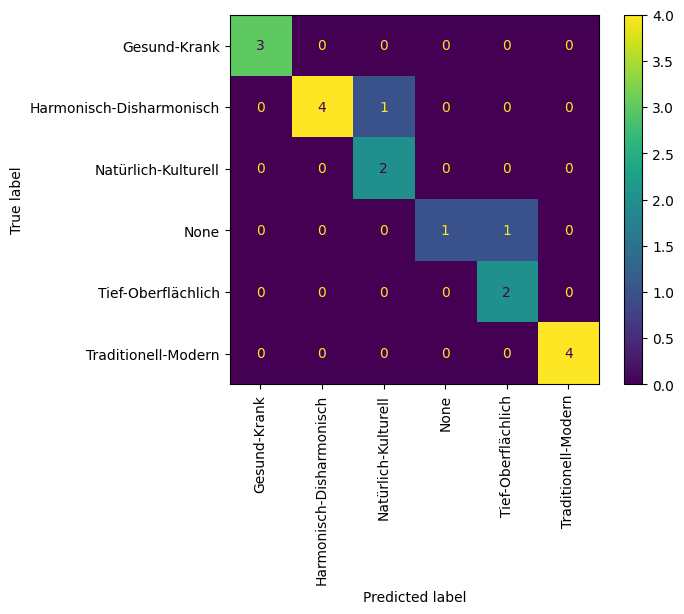

In [ ]:
abels = ['Gesund-Krank','Harmonisch-Disharmonisch','Natürlich-Kulturell','None','Tief-Oberflächlich','Traditionell-Modern']
ConfusionMatrixDisplay.from_predictions(preds, test_dataset['dimension'], display_labels = labels, xticks_rotation="vertical")

In [ ]:
#classifying unseen None-sentences
df_none_1 = df[(df['dimension'] == 'None') & (df['paradigmatic'] != 1)].sample(n=10, random_state=22)
df_none_1 = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(df_none_1['text'], df_none_1['dimension'])).items(), columns=['text', 'dimension'] ))
predss = model.predict(df_none_1['text'])
print(classification_report(predss, df_none_1['dimension']))

,text,dimension,label_text,label,paradigmatic
1148,"Josephe war, auf ihrem Gang zum Tode, dem Rich...",None,None,0.0,0.0
850,"Er stand früh auf, trat in strahlende Morgen v...",None,None,0.0,0.0
1094,Nimm ihnen ihr Geld!,None,None,0.0,0.0
1729,"Ich mußte mir jetzt zugestehen, daß ich im Zei...",None,None,0.0,0.0
73,"Plötzlich kam noch die reiche Dame an, die aus...",None,None,0.0,0.0
736,Aber meine Richtung allerdings war mir ein für...,None,None,0.0,0.0
1404,Etwa um den Vornehmen zwischen die Füße zu ren...,None,None,0.0,0.0
851,"Frauen, die er nicht ansah, leuchteten ihm ihr...",None,None,0.0,0.0
872,Im Licht des erwachenden Morgens steckte Fried...,None,None,0.0,0.0
2162,"Horch: Poltern, Klirren und Hundegebell!",None,None,0.0,0.0


### classifcation on the 6 dimensions - all MCC texts

In [ ]:
# Load SetFit model from GoogleDrive
abspath = "/content/drive/My Drive/kritik_projekt"

# Load ELTeC documents
import os
import nltk
nltk.download('punkt')

path = '/content/drive/MyDrive/kritik_projekt/corpus'
filenames = sorted([os.path.join(path, fn) for fn in os.listdir(path)])

file_texts = []
for file in filenames:
  text = open(file, 'r', encoding='utf-8').read()
  sentences = nltk.sent_tokenize(text,language='german')
  file_texts.append(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Classify MCC documents
os.chdir('/content/drive/MyDrive/kritik_projekt/corpus_classification')

model = SetFitModel.from_pretrained(os.path.join(abspath, os.path.join("models", "multilingual-e5-large-50Nones")))

text_count = 0
while text_count < len(filenames):
  sentence_predict_proba = []
  file = file_texts[text_count]
  for sentence in file:
    if len(sentence) > 1:
      #proba = model.predict_proba(sentence).tolist()
      dimension = model.predict(sentence)
      sentence_predict_proba.append((sentence, dimension))
  df = pd.DataFrame(sentence_predict_proba, columns=['sentence', 'dimension'])
  output_name = os.path.basename(filenames[text_count])[:-4]+'.csv'
  df.to_csv(output_name, sep='\t', index=False)
  print(output_name)
  text_count+=1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


dekadenzCategorical_Fallada_Der-junge-Goedeschal_normalized.csv
dekadenzCategorical_Hofmannsthal_Ein-Brief_normalized.csv
dekadenzCategorical_Jünger_Eine-gefährliche-Begegnung_normalized.csv
dekadenzCategorical_Keyserling_Abendliche-Häuser_normalized.csv
dekadenzCategorical_Kracht_1979_normalized.csv
dekadenzCategorical_Mann_Das-Wunderbare-und-andere-Nove_normalized.csv
dekadenzCategorical_Mann_Der-Geburtstag-der-Frau-Baroni_normalized.csv
dekadenzCategorical_Mann_Der-Tod-in-Venedig_normalized.csv
dekadenzCategorical_Mann_Der-Tod_normalized.csv
dekadenzCategorical_Mann_Der-kleine-Herr-Friedemann_normalized.csv
dekadenzCategorical_Mann_Ein-ernstes-Leben_normalized.csv
dekadenzCategorical_Mann_In-einer-Familie_normalized.csv
dekadenzCategorical_Mann_Pippo-Spano_normalized.csv
dekadenzCategorical_Mann_Tristan_normalized.csv
dekadenzCategorical_Mann_Wälsungenblut_normalized.csv
dekadenzCategorical_Martens_Roman-aus-der-Decadence_normalized.csv
dekadenzCategorical_Musil_Grigia_normalize

In [ ]:
sentence_predict_proba = []
model = SetFitModel.from_pretrained(os.path.join(abspath, os.path.join("models", "multilingual-e5-large-50Nones")))
for sentence in file_texts[0]:
  if len(sentence) > 1:
    proba = model.predict_proba(sentence).tolist()
    sentence_predict_proba.append((sentence, "multilingual-e5-large-50Nones", proba[0], proba[1], proba[2], proba[3], proba[4], proba[5]))
df = pd.DataFrame(sentence_predict_proba, columns=['sentence', 'model_name'] + model.labels)
df.to_csv(r'/content/drive/MyDrive/kritik_projekt/corpus/Hesse_Der-Steppenwolf_normalized.csv', sep='\t', index=False)

# Step2: classification of the 10 classes

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/kritik_projekt/setfit_data/codierungen_paradigmatic.csv', sep='\t')
df = df.fillna('None')
#df_not_paradigmatic = df[df['paradigmatic'] == 1]
dimension_label = 'Gesund-Krank'
df_one_dimension = df[df['dimension']==dimension_label]# Traditionell-Modern: 0.75, Natürlich-Kulturell: 0.9, Harmonisch-Disharmonisch: 0.76, Tief-Oberflächlich: 0.625, Gesund-Krank: 0.88

x, x_train, y, y_train = train_test_split(df_one_dimension['text'], df_one_dimension['label_text'],test_size=0.5, stratify=df_one_dimension['label_text'], random_state=2)
x_test, x_val, y_test, y_val = train_test_split(x,y,test_size = 0.5, stratify=y, random_state=2)

train_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_train, y_train)).items(), columns=['text', 'label_text'] ))
eval_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_test, y_test)).items(), columns=['text', 'label_text'] ))
test_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_val, y_val)).items(), columns=['text', 'label_text'] ))

In [ ]:
print(len(train_dataset))
print(len(eval_dataset))
print(len(test_dataset))
eval_dataset

17
8
9


Dataset({
    features: ['text', 'label_text'],
    num_rows: 8
})

In [ ]:
model = SetFitModel.from_pretrained('intfloat/multilingual-e5-large')

In [ ]:
args = TrainingArguments(
    batch_size=8,
    num_epochs=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True,
    logging_steps=5,               # number of steps to output logging (set lower because of small dataset size)
)

# Create trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    metric="accuracy",
    column_mapping={"text": "text", "label_text": "label"},  # Map dataset columns to text/label expected by trainer
)

The `evaluation_strategy` argument is deprecated and will be removed in a future version. Please use `eval_strategy` instead.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Map:   0%|          | 0/17 [00:00<?, ? examples/s]

In [ ]:
# Train and evaluate!
trainer.train()

***** Running training *****
  Num unique pairs = 162
  Batch size = 8
  Num epochs = 3


Step,Training Loss,Validation Loss
5,0.372100,0.289985
10,0.233000,0.185352
15,0.104600,0.087594
20,0.010000,0.026743
25,0.002800,0.085394
30,0.001300,0.217128
35,0.000900,0.269960
40,0.000500,0.307408
45,0.000700,0.301816
50,0.000600,0.304668


In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

Applying column mapping to the evaluation dataset
***** Running evaluation *****


{'accuracy': 0.5}


In [ ]:
#model = SetFitModel.from_pretrained(os.path.join(abspath, os.path.join("models", "9_3_3")))
preds = model.predict(test_dataset['text'])
preds

array(['krank', 'gesund', 'krank', 'krank', 'krank', 'gesund', 'krank',
       'gesund', 'gesund'], dtype='<U6')

In [ ]:
print(classification_report(preds, test_dataset['label_text']))
# Traditionell-Modern: 0.667, Natürlich-Kulturell: 0.75, Harmonisch-Disharmonisch: 0.857, Tief-Oberflächlich: 0.5, Gesund-Krank: 0.65

              precision    recall  f1-score   support

      gesund       0.75      0.75      0.75         4
       krank       0.80      0.80      0.80         5

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



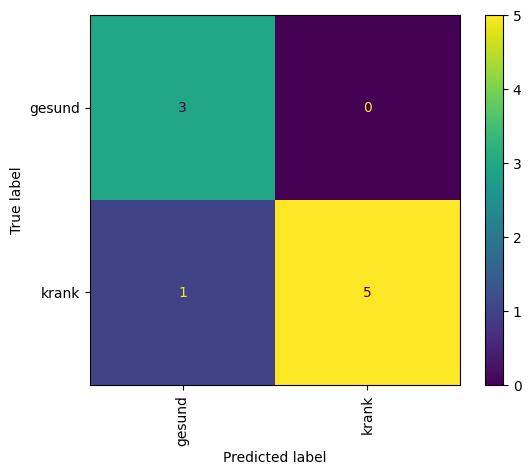

In [ ]:
labels = ['gesund','krank']#['None','disharmonisch','gesund','harmonisch','krank','kulturell','natürlich','neuartig','oberflächlich','tief','traditionell']
ConfusionMatrixDisplay.from_predictions(preds, test_dataset['label_text'], display_labels = labels, xticks_rotation="vertical")

In [ ]:
hesse_df = pd.read_csv(r'/content/drive/MyDrive/kritik_projekt/10_ELTeC_test/multilingual-e5-large-50Nones_Hesse_Der-Steppenwolf_withlabel.csv', sep='\t')
hesse_df_one_dimension = hesse_df[hesse_df['label']==dimension_label]
hesse_df_one_dimension = hesse_df_one_dimension.reset_index(drop=True)
hesse_preds = model.predict(hesse_df_one_dimension['sentence'])
hesse_df_one_dimension['final_class'] = hesse_preds
hesse_df_one_dimension.to_csv(r'/content/drive/MyDrive/kritik_projekt/10_ELTeC_test/'+dimension_label+'_Hesse_Der-Steppenwolf.csv', sep='\t', index=False)

# Step3: classification of the 10 classes - MCC texts

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/kritik_projekt/setfit_data/codierungen_paradigmatic.csv', sep='\t')
df = df.fillna('None')

In [ ]:
dimension_labels = ['Gesund-Krank']#'Harmonisch-Disharmonisch', 'Tief-Oberflächlich', 'Traditionell-Modern', 'Natürlich-Kulturell',
for dimension_label in dimension_labels:
    print(dimension_label)
    df_one_dimension = df[df['dimension']==dimension_label]# Traditionell-Modern: 0.75, Natürlich-Kulturell: 0.9, Harmonisch-Disharmonisch: 0.76, Tief-Oberflächlich: 0.625, Gesund-Krank: 0.88

    x, x_train, y, y_train = train_test_split(df_one_dimension['text'], df_one_dimension['label_text'],test_size=0.5, stratify=df_one_dimension['label_text'], random_state=2)
    x_test, x_val, y_test, y_val = train_test_split(x,y,test_size = 0.5, stratify=y, random_state=2)

    train_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_train, y_train)).items(), columns=['text', 'label_text'] ))
    eval_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_test, y_test)).items(), columns=['text', 'label_text'] ))
    test_dataset = datasets.Dataset.from_pandas(pd.DataFrame(data=dict(zip(x_val, y_val)).items(), columns=['text', 'label_text'] ))

    abspath = r"/content/drive/My Drive/kritik_projekt"
    model = SetFitModel.from_pretrained(os.path.join(abspath, os.path.join("models", "multilingual-e5-large-50Nones")))

    args = TrainingArguments(
        batch_size=8,
        num_epochs=3,
        evaluation_strategy="steps",
        save_strategy="steps",
        load_best_model_at_end=True,
        logging_steps=5,               # number of steps to output logging (set lower because of small dataset size)
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        metric="accuracy",
        column_mapping={"text": "text", "label_text": "label"},  # Map dataset columns to text/label expected by trainer
    )

    trainer.train()

    dfs_path = r'/content/drive/My Drive/kritik_projekt/corpus_classification1'
    df_names = sorted([os.path.join(dfs_path, fn) for fn in os.listdir(dfs_path)])

    os.chdir(r'/content/drive/My Drive/kritik_projekt/class10')
    df_name_count = 0
    while df_name_count < len(df_names):
        class6_df = pd.read_csv(df_names[df_name_count], sep='\t')
        class6_df_one_dimension = class6_df[class6_df['dimension']==dimension_label]
        if len(class6_df_one_dimension) != 0:
          class6_df_one_dimension = class6_df_one_dimension.reset_index(drop=True)
          class6_df_preds = model.predict(class6_df_one_dimension['sentence'])
          class6_df_one_dimension['label_text'] = class6_df_preds
          class6_df_one_dimension.to_csv(os.path.basename(df_names[df_name_count])[:-4]+'_'+dimension_label+'.csv', sep='\t', index=False)
          print(df_name_count)
        df_name_count += 1

Gesund-Krank


The `evaluation_strategy` argument is deprecated and will be removed in a future version. Please use `eval_strategy` instead.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:457: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Map:   0%|          | 0/17 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 162
  Batch size = 8
  Num epochs = 3


Step,Training Loss,Validation Loss
5,0.443400,0.421913
10,0.489100,0.382200
15,0.490000,0.336752
20,0.210600,0.297625
25,0.200300,0.326997
30,0.142000,0.325894
35,0.078700,0.348063
40,0.091800,0.361546
45,0.015300,0.363723
50,0.006700,0.361788


0
1
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
